# Affine transforms using cupy
Here we apply an affine transform using [cupy](https://cupy.dev).

In [1]:
from skimage.io import imread, imshow

import cupy
from cupyx.scipy import ndimage as ndi

(192, 256, 256)

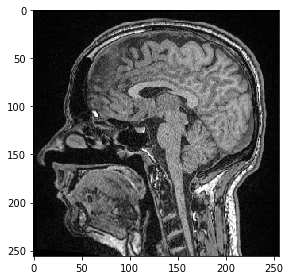

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

imshow(image[100])
image.shape

Analogously to transforms in scipy also cupy used transform matrices to describe the transformation.

In [3]:
import numpy as np

# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

Before we can apply a cupy operation to an image, we need to send it to GPU memory. We receive a handle to an image on the GPU that cannot be shown using `imshow`.

In [4]:
cuda_image = cupy.asarray(image)
cuda_image.shape

(192, 256, 256)

Analogously to the affine transform in scipy, we need to create the output image with a defined shape, twice as large as the original image, before we can write into it.

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
cuda_scaled = cupy.ndarray(output_shape)
print(cuda_scaled.shape)

(384, 512, 512)


In [6]:
r = ndi.affine_transform(cuda_image, cupy.asarray(matrix), output=cuda_scaled, output_shape=output_shape)

Before we can view the result image, we need to transfer it from GPU memory to CPU memory

In [7]:
result = cupy.asnumpy(cuda_scaled)
result.shape

(384, 512, 512)

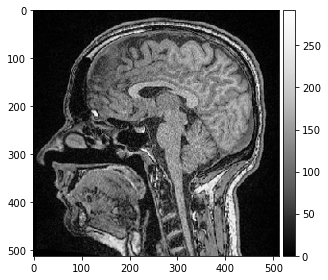

In [8]:
imshow(result[200], cmap="Greys_r", vmin=0)